# Assignment: Project-3 - Supervised Learning 

#### submitted by Subodh Nath Pushpak

The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customers relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign
### Domain: BFSI  
### Context
    This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability 
    customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year
    for liability customers showed a healthy conversion rate of over 9% success. 
    This has encouraged the retail marketing department to devise campaigns with better target marketing to increase 
    the success ratio with minimal budget. 

### Objective
#### The classification goal is to predict the likelihood of a liability customer buying personal loans

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
%matplotlib inline
from scipy.stats import zscore
from sklearn import model_selection

In [9]:
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


#### Task 1. Read the column description and ensure you understand each attribute well 

In [10]:
rows, cols = data.shape # shape of the data
print (f"There are {rows} observations / rows and {cols} attributes / columns")

There are 5000 observations / rows and 14 attributes / columns


In [11]:
data.info() # Info on each of the attribute

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


#### Observation on the attributes
 - ID: This attribute contributes nothing for data analysis. **Can be ignored**. 
 - Personal Loan : Binary attibute. Represents Did this customer accept the personal loan offered in the last campaign? **This is the target variable**
 
Binary attributes:
 - Securities Account - Does the customer have a securities account with the bank?
 - CD Account - Does the customer have a certificate of deposit (CD) account with the bank?
 - Online - Does the customer use internet banking facilities?
 - Credit Card - Does the customer use a credit card issued by Universal Bank?
 
Interval attributes:
 - Age - Customer's age in completed years 
 - Experience - Years of experience
 - Income - Annual income of the customer in dollars
 - CCAvg - Avg. spending on credit cards per month
 - Mortage - Value of house mortgage if any
 
Ordinal categorical attributes:
 - Family - Family size of the customer
 - Education - Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional 
 
Nominal attributes:
- Zip Code : Home Address ZIP code

In [13]:
# determine the sum of na values
data.apply(lambda x : sum(x.isnull()))

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [15]:
# determine if any value is null
data.isnull().values.any()  

False

In [16]:
# Eye ball the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [24]:
# Experience min is -3.0. Years of experience cannot be negative
data[data['Experience'] < 0 ]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


In [109]:
# there are records with negative experience. Before proceeding any further we need to clean the same
dataWithnegativeExperienceCount = data[data['Experience'] < 0]['Experience'].count()
print (f"There are {dataWithnegativeExperienceCount} records with negative experience")

There are 52 records with negative experience


In [119]:
# Determine if we can fill negative expereince records with median of similar records having same age and education

listWithoutNegExp = data.loc[data['Experience'] >=0]
negExplist = pd.DataFrame(data.loc[data['Experience'] < 0]) # getting the customer ID who has negative experience
for index, cust in negExplist.iterrows():
    df_filtered = listWithoutNegExp[(listWithoutNegExp.Age == cust['Age']) & (listWithoutNegExp.Education == cust['Education'])]
    exp = df_filtered['Experience'].median()
    if(np.isnan(exp)):
        print (f"There is no valid experience records for Age: {cust.Age}, Education {cust.Education}, Personal Loan {cust['Personal Loan']}")
    else:
        print (f"Age: {cust.Age}, Education {cust.Education} : exp {exp}, Personal Loan {cust['Personal Loan']}")

Age: 25.0, Education 3.0 : exp 0.0, Personal Loan 0.0
Age: 24.0, Education 2.0 : exp 0.0, Personal Loan 0.0
Age: 24.0, Education 3.0 : exp 0.0, Personal Loan 0.0
Age: 28.0, Education 3.0 : exp 3.0, Personal Loan 0.0
Age: 24.0, Education 1.0 : exp 0.0, Personal Loan 0.0
Age: 25.0, Education 2.0 : exp 0.0, Personal Loan 0.0
Age: 25.0, Education 3.0 : exp 0.0, Personal Loan 0.0
Age: 25.0, Education 3.0 : exp 0.0, Personal Loan 0.0
Age: 24.0, Education 2.0 : exp 0.0, Personal Loan 0.0
Age: 24.0, Education 1.0 : exp 0.0, Personal Loan 0.0
Age: 25.0, Education 3.0 : exp 0.0, Personal Loan 0.0
There is no valid experience records for Age: 23.0, Education 1.0, Personal Loan 0.0
Age: 24.0, Education 2.0 : exp 0.0, Personal Loan 0.0
Age: 24.0, Education 1.0 : exp 0.0, Personal Loan 0.0
Age: 24.0, Education 3.0 : exp 0.0, Personal Loan 0.0
There is no valid experience records for Age: 23.0, Education 1.0, Personal Loan 0.0
Age: 24.0, Education 2.0 : exp 0.0, Personal Loan 0.0
Age: 25.0, Education

In [139]:
# Its better to drop data with negative experience
data.drop(data[data['Experience'] < 0].index,inplace=True)
data.shape

(4948, 14)

In [142]:
data[data['Experience'] < 0]['Experience'].count()

0

In [154]:
# Eye ball the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,4948.0,2501.268795,1443.277676,1.0,1254.75,2497.5,3750.25,5000.0
Age,4948.0,45.557195,11.320735,24.0,36.00,46.0,55.00,67.0
Experience,4948.0,20.331043,11.311973,0.0,10.75,20.0,30.00,43.0
Income,4948.0,73.814470,46.112596,8.0,39.00,64.0,98.00,224.0
ZIP Code,4948.0,93151.573363,2126.669017,9307.0,91911.00,93437.0,94608.00,96651.0
Family,4948.0,2.391471,1.148444,1.0,1.00,2.0,3.00,4.0
CCAvg,4948.0,1.935926,1.747694,0.0,0.70,1.5,2.60,10.0
Education,4948.0,1.878941,0.839745,1.0,1.00,2.0,3.00,3.0
Mortgage,4948.0,56.634398,101.828885,0.0,0.00,0.0,101.00,635.0
Personal Loan,4948.0,0.097009,0.296000,0.0,0.00,0.0,0.00,1.0


### Step 2. Study the data distribution in each attribute, share your findings

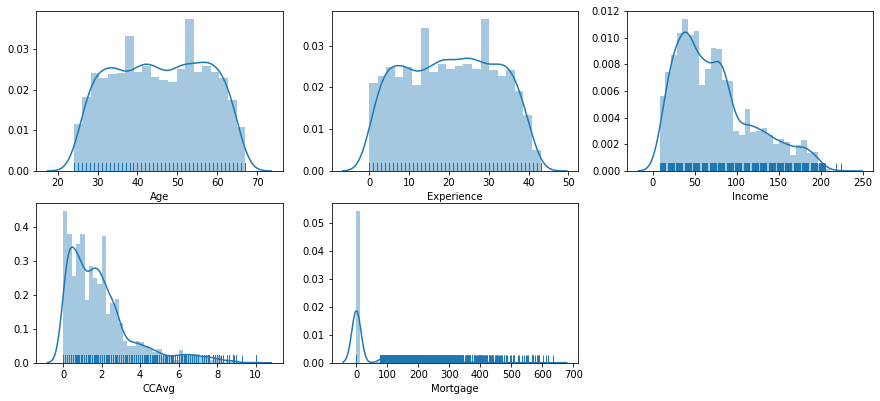

In [153]:
plt.figure(figsize= (15,10))
plt.subplot(3,3,1)
sns.distplot(data[('Age')], kde=True, rug = True )
plt.subplot(3,3,2)
sns.distplot(data[('Experience')], kde=True, rug = True )
plt.subplot(3,3,3)
sns.distplot(data[('Income')], kde=True, rug = True )
plt.subplot(3,3,4)
sns.distplot(data[('CCAvg')], kde=True, rug = True )
plt.subplot(3,3,5)
sns.distplot(data[('Mortgage')], kde=True, rug = True )

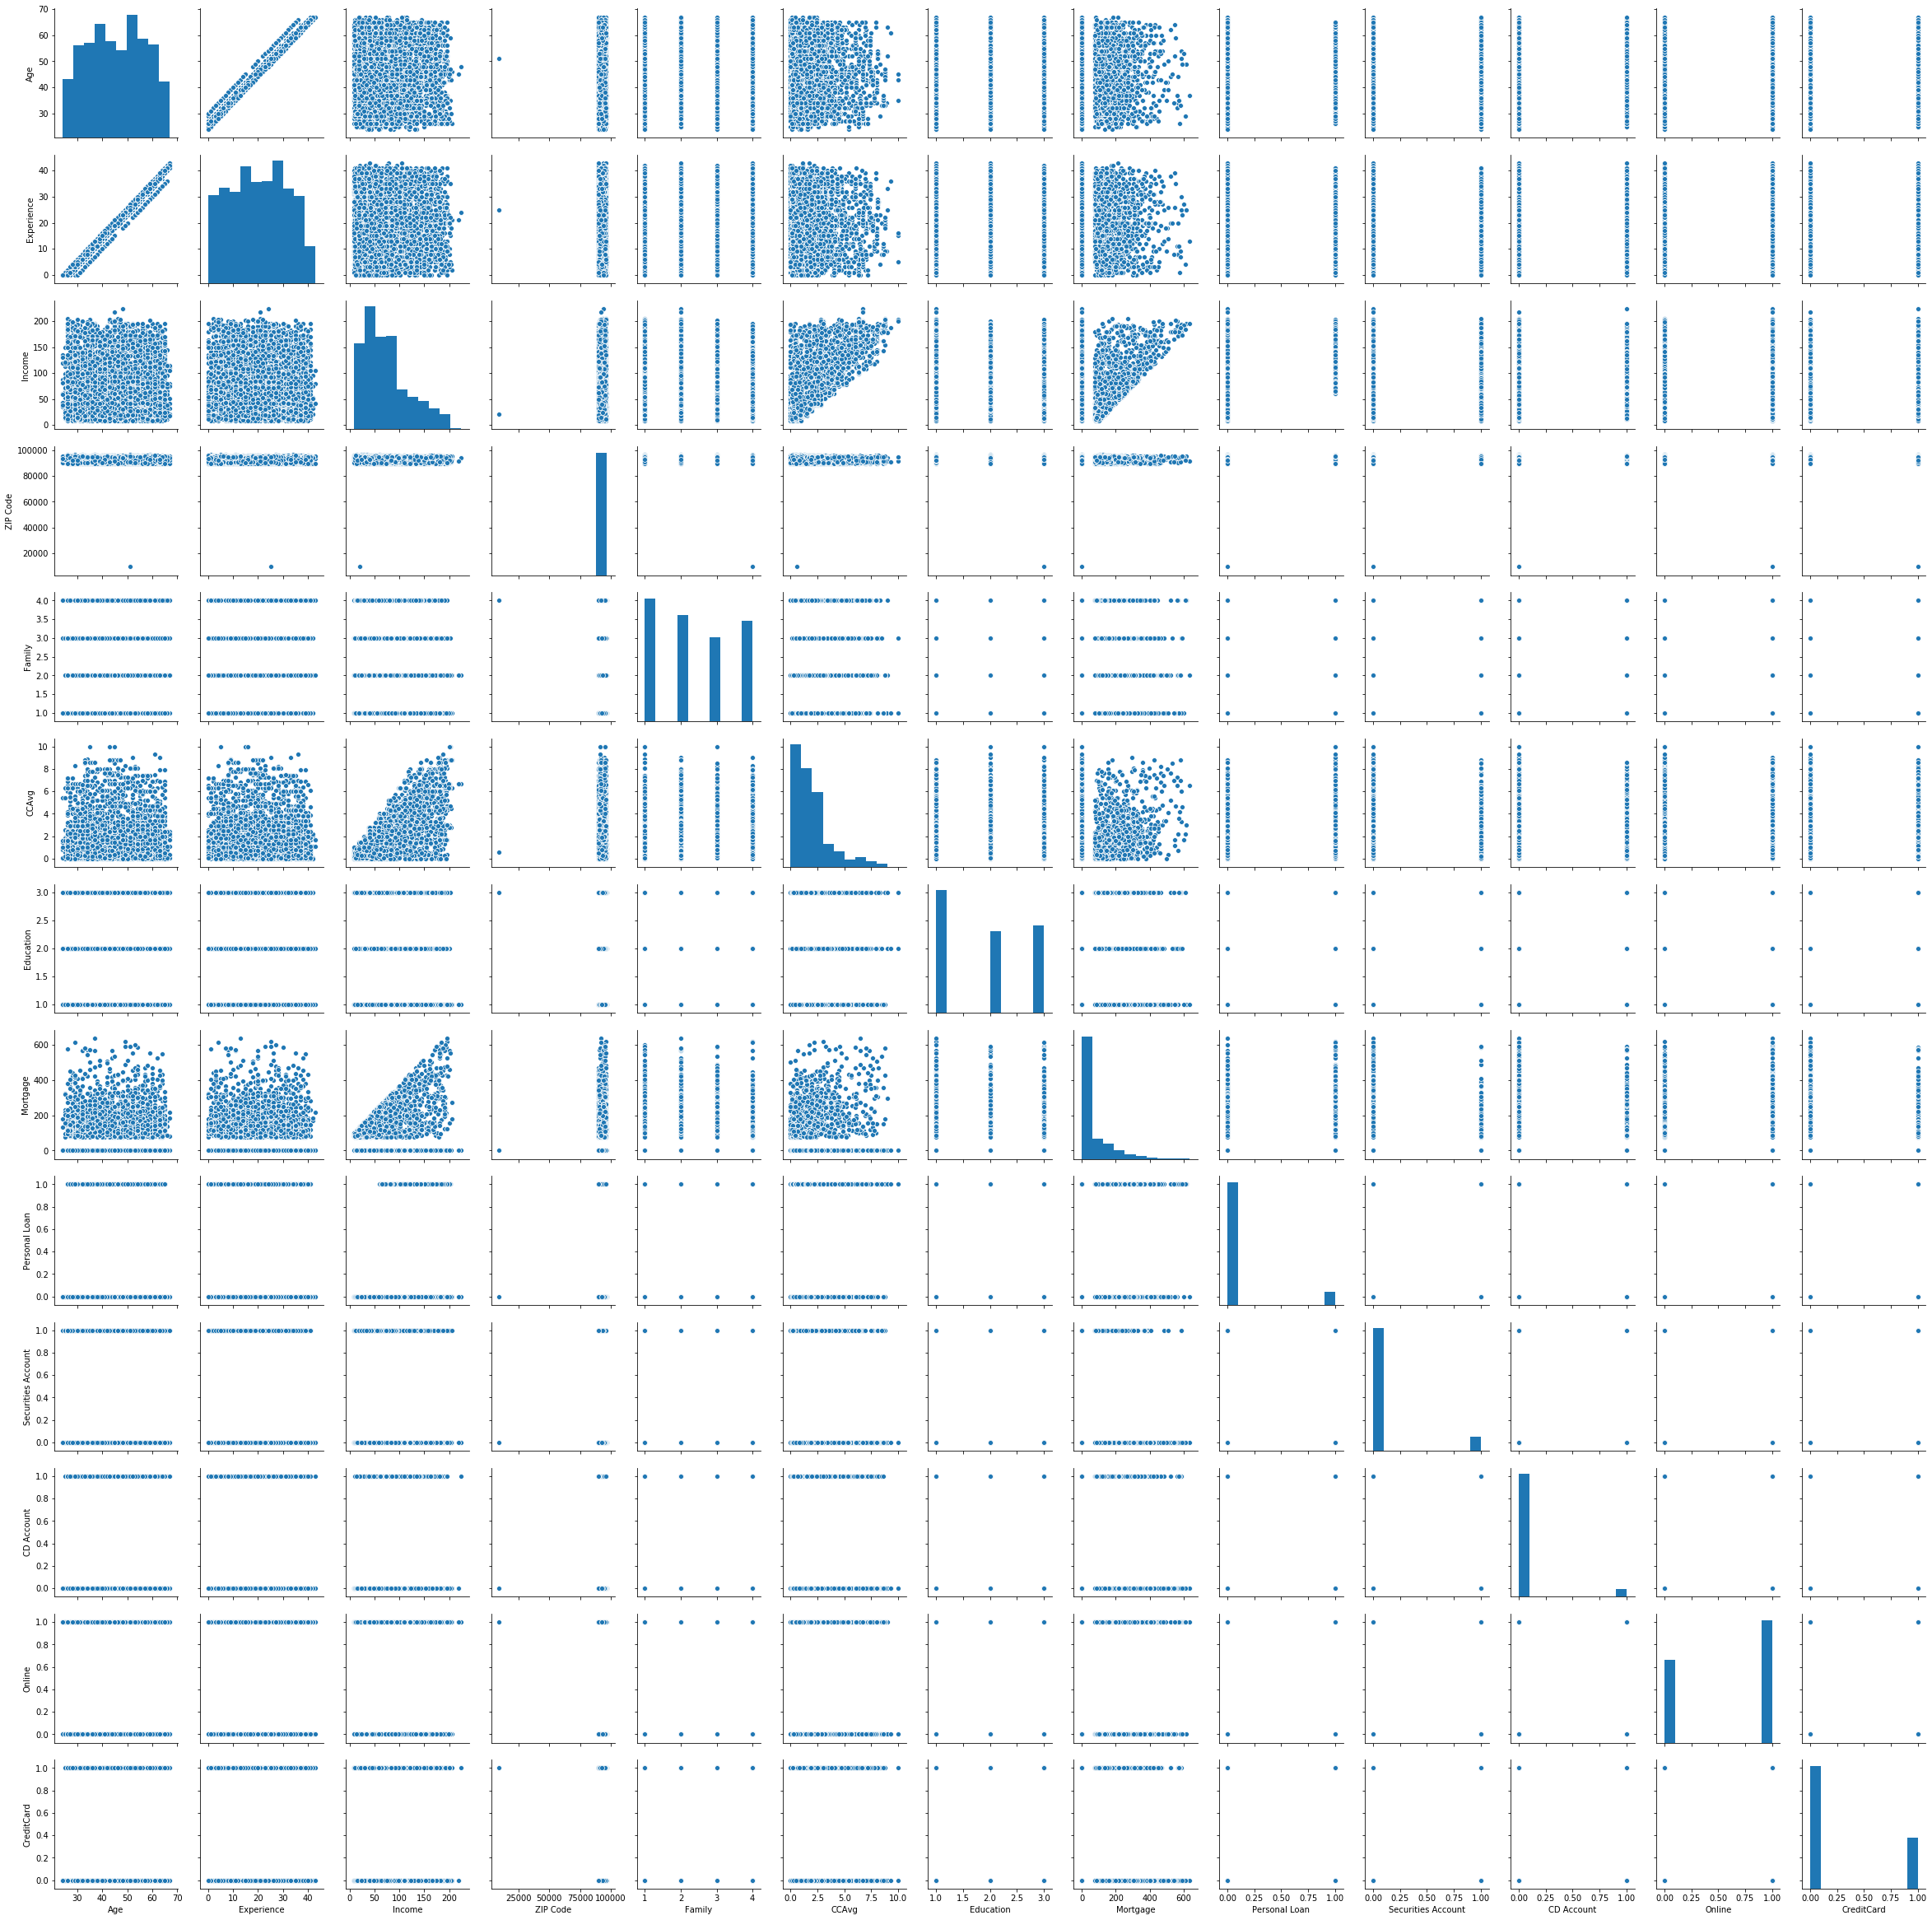

In [289]:
sns.pairplot(data.iloc[:,1:])
plt.show()

In [157]:
data.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.009794,-0.009406,-0.017255,0.013516,-0.016382,-0.025607,0.021902,-0.011172,-0.025124,-0.018961,-0.007085,-0.001508,0.017294
Age,-0.009794,1.000000,0.994101,-0.058006,-0.029325,-0.039279,-0.050879,0.046222,-0.015184,-0.014204,0.000496,0.003261,0.013542,0.007496
Experience,-0.009406,0.994101,1.000000,-0.049245,-0.028564,-0.045610,-0.048939,0.018243,-0.013459,-0.014121,-0.000457,0.005450,0.013518,0.008876
Income,-0.017255,-0.058006,-0.049245,1.000000,-0.014958,-0.155666,0.646178,-0.187992,0.206921,0.504228,-0.002327,0.170171,0.014433,-0.004493
ZIP Code,0.013516,-0.029325,-0.028564,-0.014958,1.000000,0.011109,-0.002703,-0.017391,0.008264,0.000251,0.003555,0.020149,0.019155,0.007355
Family,-0.016382,-0.039279,-0.045610,-0.155666,0.011109,1.000000,-0.107230,0.064032,-0.020419,0.063088,0.020155,0.015274,0.008466,0.012905
CCAvg,-0.025607,-0.050879,-0.048939,0.646178,-0.002703,-0.107230,1.000000,-0.133939,0.109905,0.369388,0.012477,0.137587,-0.003476,-0.007377
Education,0.021902,0.046222,0.018243,-0.187992,-0.017391,0.064032,-0.133939,1.000000,-0.032559,0.138339,-0.007508,0.014639,-0.013932,-0.012604
Mortgage,-0.011172,-0.015184,-0.013459,0.206921,0.008264,-0.020419,0.109905,-0.032559,1.000000,0.142322,-0.003717,0.089369,-0.006754,-0.006910
Personal Loan,-0.025124,-0.014204,-0.014121,0.504228,0.000251,0.063088,0.369388,0.138339,0.142322,1.000000,0.022216,0.315769,0.006175,0.002776


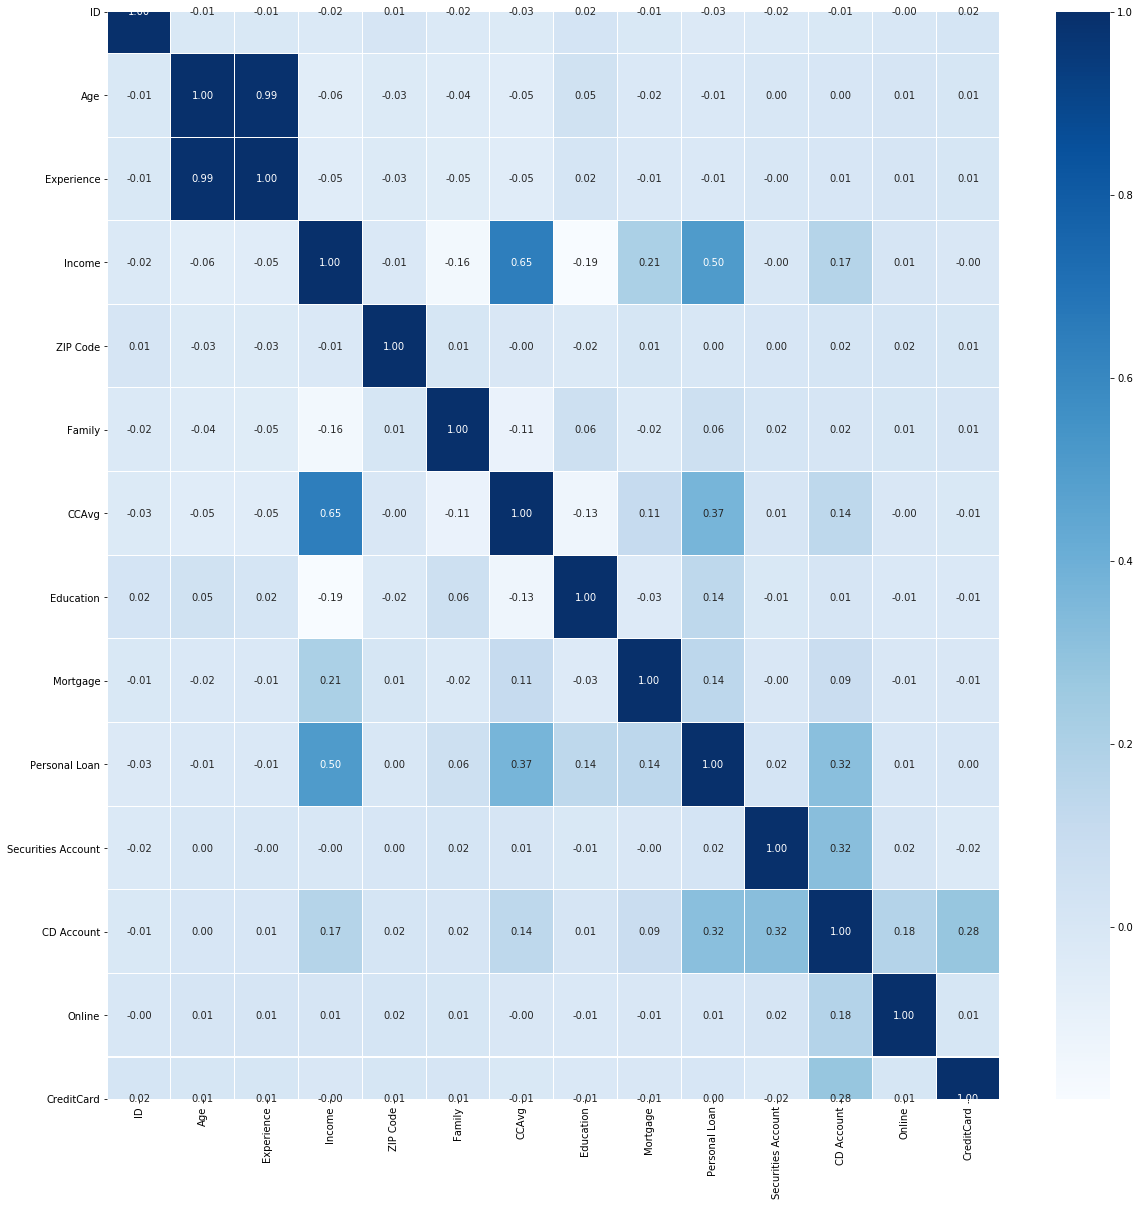

In [327]:
fig,ax = plt.subplots(figsize=(20, 20))   
sns.heatmap(data.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="Blues",linecolor='white')  
plt.show()

- Age feature is normally distributed with majority of customers falling between 30 years and 60 years of age. The observation is also confirmed by the describe statement above, which shows mean is almost equal to median
- Age and experience are highly positively correlated
- Income and CCAvg are also correlated
- Most customers experience falls in the range of 5 to 35 years
- Most customers earn an income between 10K to 100K

In [180]:
# From the perspective of Personal Loan accpeted by the customer, we can filter the corrmap with only those who accepted the
# personal loan
data.corr().loc['Personal Loan']

ID                   -0.025124
Age                  -0.014204
Experience           -0.014121
Income                0.504228
ZIP Code              0.000251
Family                0.063088
CCAvg                 0.369388
Education             0.138339
Mortgage              0.142322
Personal Loan         1.000000
Securities Account    0.022216
CD Account            0.315769
Online                0.006175
CreditCard            0.002776
Name: Personal Loan, dtype: float64

- From the correlation map and pairplot graph, we can infere that Income, CCAvg and CD Account are more corelated to Personal Loan and hence they are the most important features for this dataset

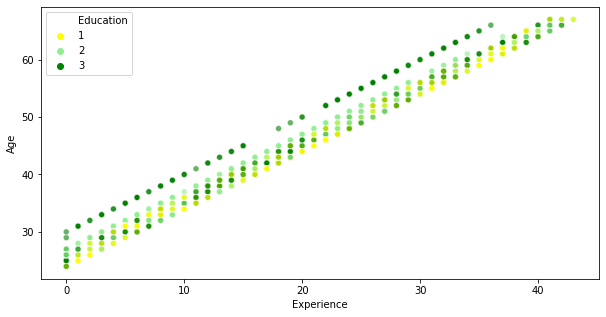

In [173]:
plt.figure(figsize=(10,5))
sns.scatterplot(data.Experience, data.Age,hue=data['Education'],palette= ['yellow', 'lightgreen','green'] ,alpha=0.6)
plt.show()

- Experience and age have a positive correlation. As experience increase age also increases. 
- The colors show the education level. 

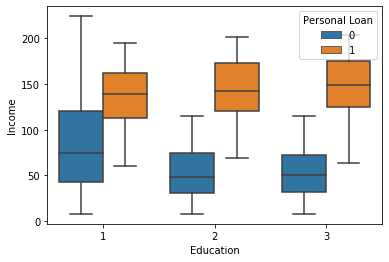

In [174]:
# Determine how education and income imapcts personal loan
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=data)

- customers with higher income have taken loans across education levels
- those with education level 1 have higher incomes

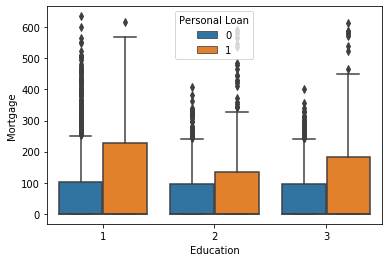

In [177]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=data)

- Customers with loan also have high mortgage

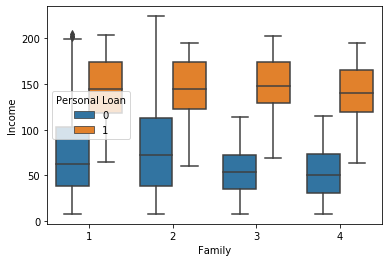

In [204]:
sns.boxplot(x=data.Family,y=data.Income,hue=data['Personal Loan'])

- Families with income < 100 K are less ikely to take loans

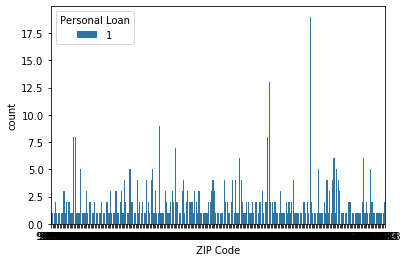

In [313]:
#determine zip codes who have taken most loans
sns.countplot(x='ZIP Code', data=data[data['Personal Loan']==1], hue ='Personal Loan',orient ='v')

In [317]:
# top 5 Zip codes which have take loans before
zipcode_top5 = data[data['Personal Loan'] ==1]['ZIP Code'].value_counts().head(5)
zipcode_top5

94720    19
94305    13
92093     9
90095     8
90089     8
Name: ZIP Code, dtype: int64

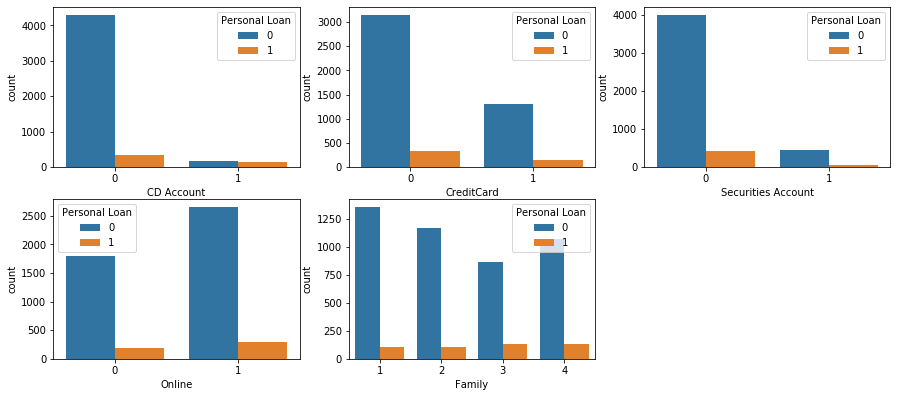

In [320]:
plt.figure(figsize= (15,10))
plt.subplot(3,3,1)
sns.countplot(x="CD Account", data=data,hue="Personal Loan")
plt.subplot(3,3,2)
sns.countplot(x="CreditCard", data=data,hue="Personal Loan")
plt.subplot(3,3,3)
sns.countplot(x="Securities Account", data=data,hue="Personal Loan")
plt.subplot(3,3,4)
sns.countplot(x="Online", data=data,hue="Personal Loan")
plt.subplot(3,3,5)
sns.countplot(x='Family',data=data,hue='Personal Loan')

- Almost all customers who has CD account has loan. However, majority of Customers who do not have CD account, does not have loan. 
- More people without credit card have loan than who do not have credit card. 
- More people without security card have loan than who do not have
- More people who have taken loan use internet banking facilities than offline 
- Family size does not have any considerable impact in personal loan.

### 3. Get the target column distribution

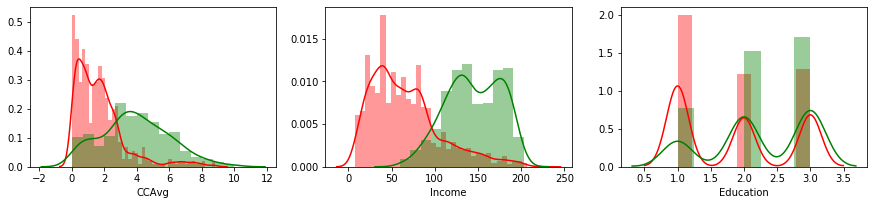

In [323]:
plt.figure(figsize= (15,10))
plt.subplot(3,3,1)
sns.distplot( data[data['Personal Loan'] == 0]['CCAvg'], color = 'r')
sns.distplot( data[data['Personal Loan'] == 1]['CCAvg'], color = 'g')
plt.subplot(3,3,2)
sns.distplot( data[data['Personal Loan'] == 0]['Income'], color = 'r')
sns.distplot( data[data['Personal Loan'] == 1]['Income'], color = 'g')
plt.subplot(3,3,3)
sns.distplot( data[data['Personal Loan'] == 0]['Education'], color = 'r')
sns.distplot( data[data['Personal Loan'] == 1]['Education'], color = 'g')

- Customers who have personal loan have a higher credit card average than those who did not take loan.  
- The high credit card average seems to be good predictor of whether or not a customer will take a personal loan.

In [209]:
data.groupby(['Personal Loan']).count()  

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,4468,4468,4468,4468,4468,4468,4468,4468,4468,4468,4468,4468,4468
1,480,480,480,480,480,480,480,480,480,480,480,480,480


Text(0.5, 1.0, 'Personal Loan Details')

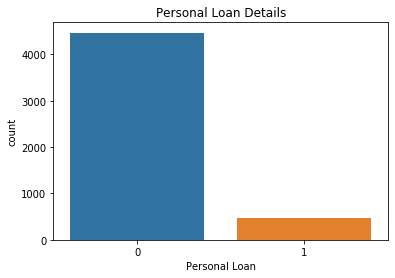

In [211]:
sns.countplot(x = data['Personal Loan'])
plt.title('Personal Loan Details')

- The data set is skewed in terms of target column (Personal loan)
- There are far few records in class 1 i.e. people who took the personal loan last time.

### 4. Split the data into training and test set in the ratio of 70:30 respectively  
### 5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans  
### 6. Print the confusion matrix for all the above models 

#### logistic regression

In [352]:

# Store the target column into Y array

X_df = data.loc[:, data.columns != 'Personal Loan'] # Separate the independent attributes and store them in X array
y_df = data.loc[:, data.columns == 'Personal Loan']

# Prepare data for logistic regression

features=X_df.iloc[:, 0:10]
features_array = features.values   #logistic modeling algorithm requires feature array not dataframe
target_labels = y_df.values
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code when using random functions to 

# generate the training and test data

X_train, X_test, y_train, y_test = model_selection.train_test_split(features_array, target_labels, test_size=test_size, random_state=seed)
y_train = np.ravel(y_train)   # to convert 1 d vector into 1 d array

print("{0:0.2f}% data is in training set".format((len(X_train)/len(data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(data.index)) * 100))


69.99% data is in training set
30.01% data is in test set


In [353]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0 -0.000054  0.007472  0.005673  0.035826 -0.000069  0.008575  0.003744   

          7         8         9  intercept  
0  0.009446  0.000784  0.000736   -0.00004  


In [356]:
lr_model_score = model.score(X_test, y_test)
print(lr_model_score)
lr_confusion_matrix = metrics.confusion_matrix(y_test, y_predict)
print(lr_confusion_matrix)

0.9037037037037037
[[1297   39]
 [ 104   45]]


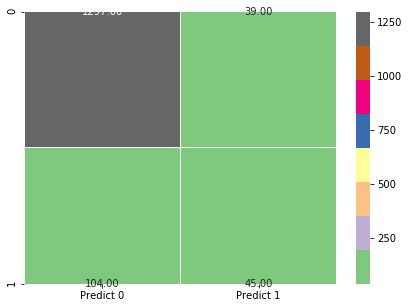

In [355]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["0","1"]],
                  columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, linewidths=0.05, fmt= '.2f',cmap="Accent")

In [360]:
# summarize the fit of the model
lr_classification_report = metrics.classification_report(y_test, y_predict)
print(lr_classification_report)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1336
           1       0.54      0.30      0.39       149

    accuracy                           0.90      1485
   macro avg       0.73      0.64      0.67      1485
weighted avg       0.89      0.90      0.89      1485



- The accuracy score of .93 looks good but it is unreliable as it is a score at model level. 
- At class level, especially the class 1, the precision and recall is very low

#### Naive Bayes Model

In [362]:
from sklearn.naive_bayes import GaussianNB

# Invoking the NB Gaussian function to create the model
# fitting the model in the training data set
naive_model = GaussianNB()
naive_model.fit(X_train, y_train)

predictions=naive_model.predict(X_test)
nb_accuracy_score = metrics.accuracy_score(y_test,predictions)
print(nb_accuracy_score)

0.901010101010101


In [365]:
#Assess the accuracy of the model on test data
nb_confusion_matrix = metrics.confusion_matrix(y_test,predictions)
print(nb_confusion_matrix)

[[1243   93]
 [  54   95]]


In [377]:
# make predictions
expected = y_test
predicted = model.predict(X_test)
nb_classification_report = metrics.classification_report(expected, predicted)
print(nb_classification_report)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1336
           1       0.54      0.30      0.39       149

    accuracy                           0.90      1485
   macro avg       0.73      0.64      0.67      1485
weighted avg       0.89      0.90      0.89      1485



In [259]:
from sklearn.metrics import confusion_matrix,classification_report
df_table = confusion_matrix(y_test,predicted)
a = (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1])
p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
f = (2 * p * r) / (p + r)

print("accuracy : ",round(a,2))
print("precision: ",round(p,2))
print("recall   : ",round(r,2))
print("F1 score : ",round(f,2))

accuracy :  0.9
precision:  0.51
recall   :  0.64
F1 score :  0.56


- For Naive bayes; the precision and recall is very low

#### K Nearest Neighbours

In [271]:
# convert all dimensions to z scores
from sklearn import preprocessing
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

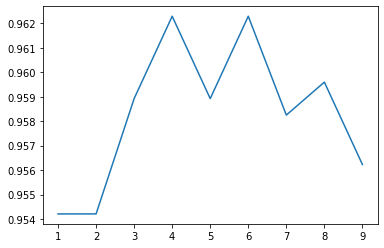

In [285]:
scores =[]
maxRange = 10
for k in range(1,maxRange):
    NNH = KNeighborsClassifier(n_neighbors= k , weights = 'distance' ) 
    NNH.fit(X_train_scaled, y_train)
    scores.append(NNH.score(X_test_scaled, y_test))
plt.plot(range(1,maxRange),scores)

In [381]:
# choosing n_neighbors as 6 
NNH = KNeighborsClassifier(n_neighbors= 6 , weights = 'distance')
NNH.fit(X_train_scaled, y_train)
predicted_labels = NNH.predict(X_test_scaled)
knn_accuracy_score = metrics.accuracy_score(y_test,predicted_labels)
print(knn_accuracy_score)
knn_confusion_matrix = metrics.confusion_matrix(y_test, predicted_labels)
print(knn_confusion_matrix)

0.9622895622895623
[[1334    2]
 [  54   95]]


In [383]:
knn_classification_report = metrics.classification_report(y_test, predicted_labels)
print(knn_classification_report)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1336
           1       0.98      0.64      0.77       149

    accuracy                           0.96      1485
   macro avg       0.97      0.82      0.88      1485
weighted avg       0.96      0.96      0.96      1485



- scaled KNN algorithm provides much better results than both Regression and Naive Bayes

#### State Vector Machine (SVM)

In [404]:
from sklearn.svm import SVC
svc = SVC(C= .1, kernel='linear', gamma= 1) # (kernel='rbf')  (kernel='poly')  (kernel='sigmoid')
svc.fit(X_train_scaled, y_train)
predicted_labels = svc.predict(X_test_scaled)
svm_model_score = svc.score(X_test_scaled, y_test)
print(svm_model_score)

0.9494949494949495


In [405]:
svm_confusion_matrix = metrics.confusion_matrix(predicted_labels,y_test)
print(svc_confusion_matrix)

[[1325   64]
 [  11   85]]


In [407]:
svm_classification_report = metrics.classification_report(y_test, predicted_labels)
print(svm_classification_report)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1336
           1       0.89      0.57      0.69       149

    accuracy                           0.95      1485
   macro avg       0.92      0.78      0.83      1485
weighted avg       0.95      0.95      0.94      1485



In [ ]:
- SVM precision is good but the recall is not as good

#### Decision Tree

In [329]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'gini' )
dt_model.fit(X_train, y_train)

dt_score =dt_model.score(X_test , y_test) 
dt_score

0.9771043771043771

In [291]:
y_predict = dt_model.predict(X_test)

In [331]:
dt_confusion_matrix = metrics.confusion_matrix(y_test, y_predict)
print(dt_confusion_matrix)

[[1319   17]
 [  18  131]]


In [333]:
dt_classification_report = metrics.classification_report(y_test, y_predict)
print(dt_classification_report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1336
           1       0.89      0.88      0.88       149

    accuracy                           0.98      1485
   macro avg       0.94      0.93      0.93      1485
weighted avg       0.98      0.98      0.98      1485



- Both Precision and recall have decent values and Decision Tree seems to be the best model after KNN

### 6. Print the confusion matrix for all the above models
### 7. Give your reasoning on which is the best model in this case and why it performs better? 

In [408]:
accuracy = pd.DataFrame([[lr_model_score,lr_confusion_matrix],
                         [nb_accuracy_score,nb_confusion_matrix],
                        [knn_accuracy_score,knn_confusion_matrix],
                        [svc_model_score,svc_confusion_matrix],
                        [dt_score,dt_confusion_matrix]],
                       columns = ['Accuracy', 'confusion matrix'],
                       index = ['Logistic Regression Model','Naive Bayes Model','KNN Model',
                               'Support Vector Machine Model','Decision Tree Model'])
accuracy

,Accuracy,confusion matrix
Logistic Regression Model,0.903704,"[[1297, 39], [104, 45]]"
Naive Bayes Model,0.901010,"[[1243, 93], [54, 95]]"
KNN Model,0.962290,"[[1334, 2], [54, 95]]"
Support Vector Machine Model,0.949495,"[[1325, 64], [11, 85]]"
Decision Tree Model,0.977104,"[[1319, 17], [18, 131]]"


In [384]:
print(f'Logistic regression classification report: \n{lr_classification_report}')
print(f'Naive Bayes classification report: \n{nb_classification_report}')
print(f'K nearest neighbours classification report: \n{knn_classification_report}')
print(f'Support Vector Machine classification report: \n{svm_classification_report}')
print(f'Decision tree classification report: \n{dt_classification_report}')

Logistic regression classification report: 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1336
           1       0.54      0.30      0.39       149

    accuracy                           0.90      1485
   macro avg       0.73      0.64      0.67      1485
weighted avg       0.89      0.90      0.89      1485

Naive Bayes classification report: 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1336
           1       0.54      0.30      0.39       149

    accuracy                           0.90      1485
   macro avg       0.73      0.64      0.67      1485
weighted avg       0.89      0.90      0.89      1485

K nearest neighbours  classification report: 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1336
           1       0.98      0.64      0.77       149

    accuracy                           0.96      1485
  

- Descision tree has the max performance score with reasonable confusion matrix numbers. The classification report for the decision tree also has better numbers than other algorithms.
- From the above models scores, confusion matrix and classfication report it is clear that the best performace is of Decision Tree followed by KNN